# Asset Pricing Homework 5

*By Daniel Deutsch, José Lucas Barretto and Ziyad Bekkaoui*.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

## Calculate Fair Price on Stocks

In the following piece of code, we built a function that, given the parameters, returns the fair price of a stock at a given date.

In [16]:
def calculate_fair_price(N, S, sigma, K, r, T, type_='call'):
    
    # Calculates variables
    dt = T/N
    u = np.exp( sigma * np.sqrt(dt) )
    d =  np.exp( -sigma * np.sqrt(dt) )
    q = ( np.exp(r*dt) - d) / (u - d)

    # Instantiates arrays
    stock = np.zeros((N+1, N+1))
    intrinsic_value = np.zeros((N+1, N+1))
    option = np.zeros((N+1, N+1))

    # Fills the intrinsic value and stock arrays
    # Note that some of the indexes are different because python's arrays starts with 0 instead of 1.
    for i in range(N+1):
        for j in range(i+1):
            stock[i, j] = S * u**j * d**(i-j)
            if type_ == 'call':
                intrinsic_value[i, j] = max(stock[i, j] - K, 0)
            elif type_ == 'put':
                intrinsic_value[i, j] = max(K - stock[i, j], 0)

    # Calculates the option array
    option[option.shape[0]-1, :] = intrinsic_value[intrinsic_value.shape[0]-1, :]
    for i in list(range(N))[::-1]:
        for j in list(range(i+1)):
            option[i, j] = ((1-q)*option[i+1, j] + q*option[i+1, j+1])/np.exp(r*dt)

    return option[0, 0]

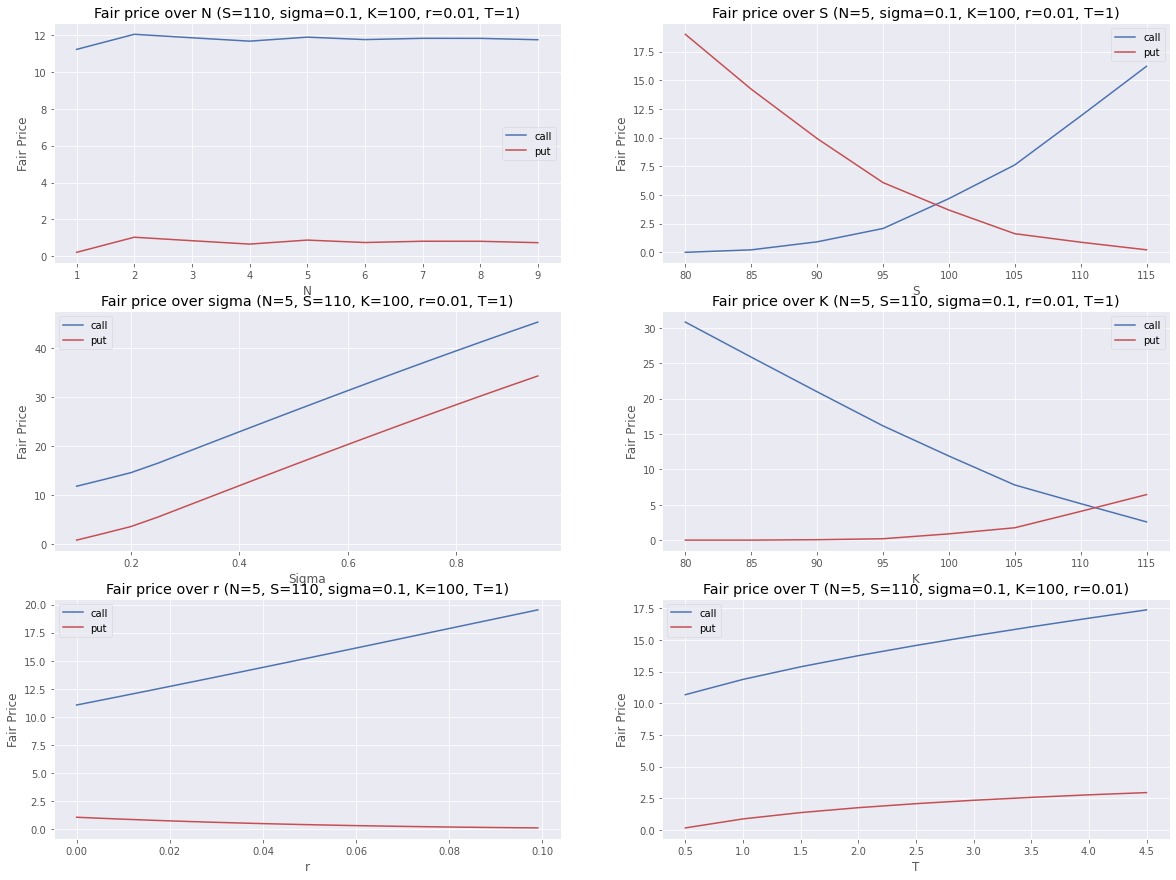

In [22]:
# Defines the plotting intervals
Ns = np.arange(1, 10, 1)
Ss = np.arange(80, 120, 5)
sigmas = np.arange(0.1, 1, 0.05)
Ks = np.arange(80, 120, 5)
rs = np.arange(0.00, 0.1, 0.001)
Ts = np.arange(0.5, 5, 0.5)

# Defines the constants for ceteris paribus
N = 5
S = 110
sigma = 0.1
K = 100
r = 0.01
T = 1

# Plots
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

axs[0, 0].plot(Ns, [calculate_fair_price(N, S, sigma, K, r, T, 'call') for N in Ns], label='call')
axs[0, 0].plot(Ns, [calculate_fair_price(N, S, sigma, K, r, T, 'put') for N in Ns], label='put')
axs[0, 0].set_title(f"Fair price over N ({S=}, {sigma=}, {K=}, {r=}, {T=})")
axs[0, 0].set_xlabel("N")
axs[0, 0].set_ylabel("Fair Price")
axs[0, 0].legend()

axs[0, 1].plot(Ss, [calculate_fair_price(N, S, sigma, K, r, T, 'call') for S in Ss], label='call')
axs[0, 1].plot(Ss, [calculate_fair_price(N, S, sigma, K, r, T, 'put') for S in Ss], label='put')
axs[0, 1].set_title(f"Fair price over S ({N=}, {sigma=}, {K=}, {r=}, {T=})")
axs[0, 1].set_xlabel("S")
axs[0, 1].set_ylabel("Fair Price")
axs[0, 1].legend()

axs[1, 0].plot(sigmas, [calculate_fair_price(N, S, sigma, K, r, T, 'call') for sigma in sigmas], label='call')
axs[1, 0].plot(sigmas, [calculate_fair_price(N, S, sigma, K, r, T, 'put') for sigma in sigmas], label='put')
axs[1, 0].set_title(f"Fair price over sigma ({N=}, {S=}, {K=}, {r=}, {T=})")
axs[1, 0].set_xlabel("Sigma")
axs[1, 0].set_ylabel("Fair Price")
axs[1, 0].legend()

axs[1, 1].plot(Ks, [calculate_fair_price(N, S, sigma, K, r, T, 'call') for K in Ks], label='call')
axs[1, 1].plot(Ks, [calculate_fair_price(N, S, sigma, K, r, T, 'put') for K in Ks], label='put')
axs[1, 1].set_title(f"Fair price over K ({N=}, {S=}, {sigma=}, {r=}, {T=})")
axs[1, 1].set_xlabel("K")
axs[1, 1].set_ylabel("Fair Price")
axs[1, 1].legend()

axs[2, 0].plot(rs, [calculate_fair_price(N, S, sigma, K, r, T, 'call') for r in rs], label='call')
axs[2, 0].plot(rs, [calculate_fair_price(N, S, sigma, K, r, T, 'put') for r in rs], label='put')
axs[2, 0].set_title(f"Fair price over r ({N=}, {S=}, {sigma=}, {K=}, {T=})")
axs[2, 0].set_xlabel("r")
axs[2, 0].set_ylabel("Fair Price")
axs[2, 0].legend()

axs[2, 1].plot(Ts, [calculate_fair_price(N, S, sigma, K, r, T, 'call') for T in Ts], label='call')
axs[2, 1].plot(Ts, [calculate_fair_price(N, S, sigma, K, r, T, 'put') for T in Ts], label='put')
axs[2, 1].set_title(f"Fair price over T ({N=}, {S=}, {sigma=}, {K=}, {r=})")
axs[2, 1].set_xlabel("T")
axs[2, 1].set_ylabel("Fair Price")
axs[2, 1].legend()

plt.show()

## Pricing of an option with a corporate bond as underlying asset

Consider the following yield curves from Euro area government and AAA corporate bonds with maturities from 1 to 10 years.
- Date: 11/09/2021
- Source: www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html

In [33]:
rf_yields = np.array([
    -0.809032, -0.758893, -0.689259, -0.611218, -0.531915,
    -0.455755, -0.385263, -0.321695, -0.265478, -0.216511
    ])/100

aaa_yields = np.array([
    -0.700941, -0.611842, -0.504322, -0.387642, -0.268894,
    -0.153018, -0.043148, 0.058958, 0.152532, 0.237466
    ])/100

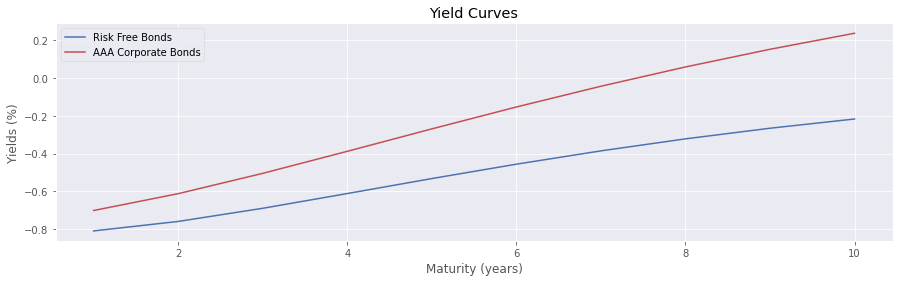

In [34]:
plt.figure()
plt.title('Yield Curves')
plt.plot(np.arange(1, 11), 100*rf_yields)
plt.plot(np.arange(1, 11), 100*aaa_yields)
plt.legend(['Risk Free Bonds', 'AAA Corporate Bonds'])
plt.xlabel('Maturity (years)')
plt.ylabel('Yields (%)')
plt.show()

We'll write a function to estimate default probabilities and calculate the fair price for bonds with maturity of 1 and 2 years. We can do this by using the formulas deduced in the course's pedagogic material.

In [179]:
def calculate_maturity(rf_yields, aaa_yields, S, recovery_rate):

    # initialize arrays
    Bf = np.exp(-rf_yields[:2]) # risk free zero coupon rates
    V = np.exp(-aaa_yields[:2]) # risky zero coupon rates
    u = np.zeros(len(B_f)) # default probabilities

    # estimate default probability for maturity of 1 year
    u[0] = (1 - V[0]/Bf[0])/(1 - recovery_rate)

    # estimate default probability for maturity of 2 years
    u[1] = (1 - (V[1]/(Bf[0]*Bf[1]) - u[0]*recovery_rate)/(1 - u[0]))/(1 - recovery_rate)

    print('Default Probabilities:')
    print(f'1y Maturity: {np.round(100*u[0], 2)}%')
    print(f'2y Maturity: {np.round(100*u[1], 2)}%')

    return u

In [195]:
def calculate_fair_price_bonds(rf_yields, aaa_yields, S, recovery_rate, K, pi, sigma, type_='put'):
    
    # Set variables
    N = 2
    dt = 1
    up = np.exp( sigma * np.sqrt(dt) )
    down =  np.exp( -sigma * np.sqrt(dt) )
    
    # calculate default probabilities
    u = calculate_maturity(rf_yields, aaa_yields, S, recovery_rate)

    # Instantiates arrays
    V_tree = np.zeros((1, N+2))
    G = np.zeros((1, N+2))
    
    # no default, yields up
    V_tree[0, 0] = S*Bf[1]*up*(1 - u[1]*(1 - recovery_rate))

    # no default, yields down
    V_tree[0, 1] = S*Bf[1]*down*(1 - u[1]*(1 - recovery_rate))

    # default, yields up
    V_tree[0, 2] = S*Bf[1]*up*(recovery_rate)
    
    # default, yields down
    V_tree[0, 3] = S*Bf[1]*down*(recovery_rate)

    print('\nExpected bond prices at date 1:')
    print('- no default, yields up:', np.round(V_tree[0, 0], 2))
    print('- no default, yields down:', np.round(V_tree[0, 1], 2))
    print('- default, yields up:', np.round(V_tree[0, 2], 2))
    print('- default, yields down:', np.round(V_tree[0, 3], 2))

    if type_ == 'call':
        G =  np.where(V_tree - K > 0, V_tree, 0)
    elif type_ == 'put':
        G =  np.where(K - V_tree > 0, V_tree, 0)

    fair_price = Bf[0]*((1 - u[0])*(pi*G[0,0] + (1 - pi)*G[0,1]) + u[0]*(pi*G[0,2] + (1 - pi)*G[0,3]))

    print(f'\nFair price for {type_} option:', np.round(fair_price, 2))
    return fair_price

In [196]:
fair_price = calculate_fair_price_bonds(
    rf_yields, aaa_yields,
    S=100,
    recovery_rate=0.4,
    K=100,
    pi=0.5,
    sigma=0.01,
    type_='put'
    )

Default Probabilities:
1y Maturity: 0.18%
2y Maturity: 1.41%

Expected bond prices at date 1:
- no default, yields up: 100.91
- no default, yields down: 98.92
- default, yields up: 40.71
- default, yields down: 39.9

Fair price for put option: 49.84
